In [1]:
import numpy as np
import pandas as pd
import os
import pprint
import json
import os, sys
import random
from math import cos, sin
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import cluster, datasets, mixture

In [3]:
dataset_name = "concentric_circles"

In [8]:
input_dir = './raw'
output_dir = './processed'

inp_fname = 'data.csv'

outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_test_key_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
outp_infer_instances = os.path.join(output_dir, f'{dataset_name}_infer_req.json')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Create Concentric Circles Data

In [5]:
def create_concentric_circles(n_samples, factor, noise):
    samples = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise, shuffle=True)
    return samples

In [6]:
def set_seeds(seed_value=0):
    random.seed(seed_value)
    os.environ['PYTHONHASHSEED']=str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)

num samples: 3000


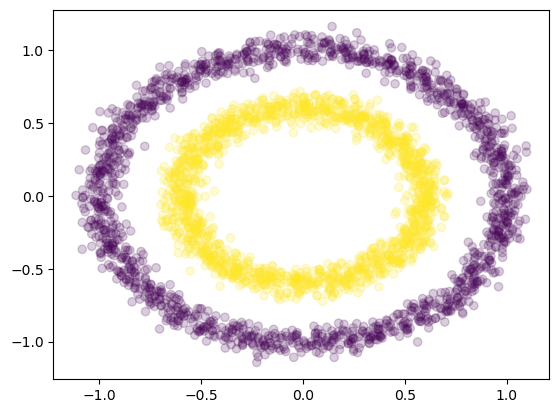

In [7]:
set_seeds(0)
n_samples = 3000
samples = create_concentric_circles(n_samples, factor=0.6, noise=0.05)

# save plot
X, y = samples   
print("num samples:", X.shape[0])
fig = plt.scatter(X[:,0], X[:, 1], alpha=0.2, c=y)

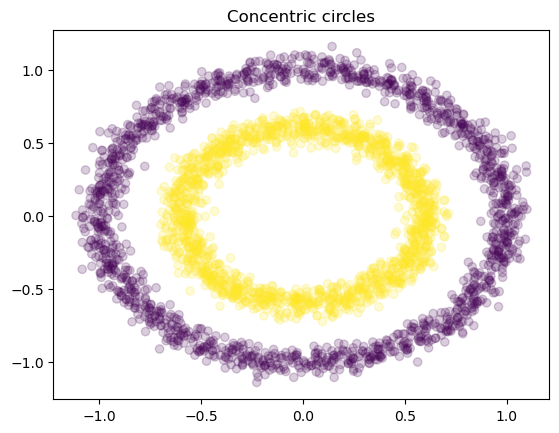

In [11]:
fig = plt.scatter(X[:,0], X[:, 1], alpha=0.2, c=y)
plt.title("Concentric circles")
plt.savefig(outp_fig_fname)

In [132]:
id_col = "id"
target_col = "y"

In [133]:
df = pd.DataFrame(X, columns=["x1", "x2"])
df["y"] = y
df.insert(0, id_col, np.arange(X.shape[0]))

data[id_col] = data[id_col].astype(str)
df.head()

,id,x1,x2,y
0,0,0.297169,0.976234,0
1,1,-0.432801,-0.967617,0
2,2,0.507381,0.196217,1
3,3,0.598753,-0.152070,1
4,4,0.569492,0.007363,1


In [134]:
df.to_csv(os.path.join(input_dir, f"{dataset_name}.csv"), index=False)

# Shuffle Data

In [135]:
# shuffle data
data = data.sample(frac=1, random_state=42)
data.head()

,id,x1,x2,y
2608,2608,0.077885,-0.536796,1
2332,2332,0.271885,0.476800,1
362,362,0.700556,0.009330,1
2972,2972,-0.358092,0.466737,1
2929,2929,-0.076285,0.568639,1


# Save Main Data File

In [136]:
data.drop(target_col,axis=1).to_csv(outp_fname, index=False)

# Test Key

In [137]:
data_key = data[[id_col, target_col]].rename(columns={target_col: "__target__"})
data_key.to_csv(outp_test_key_fname, index=False)

# JSON inference request instance

In [138]:
instance = data.drop(columns=[target_col]).reset_index(drop=True).loc[0].to_dict()
infer_req_instance_dict = {  "instances": [ {**instance}, ] }
pprint.pprint(infer_req_instance_dict)
   
with open(outp_infer_instances, 'w', encoding='utf8') as f:
    json.dump(infer_req_instance_dict, f, indent=2, ensure_ascii=False)

{'instances': [{'id': '2608',
                'x1': 0.0778846002011968,
                'x2': -0.5367962857405588}]}
